In [1]:
import numpy as np

import torch
import torchvision

import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## DIP, JointDIP on SCM3, MNIST3 (Corollary 1)

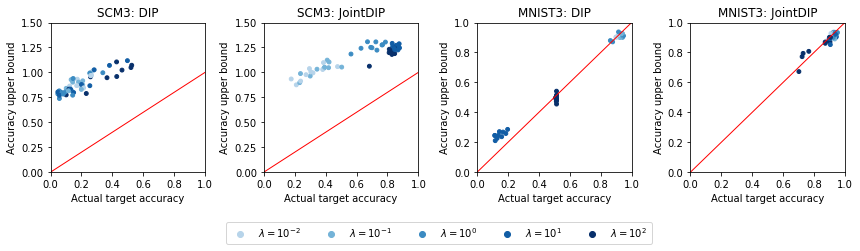

In [3]:
lambdas = [.01, .1, 1., 10., 100.]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5))
for k, (exp, joint) in enumerate([("SCM3", ""), ("SCM3", "Joint"), ("MNIST3", ""), ("MNIST3", "Joint")]):
    upper = np.zeros((10, 5))
    actual = np.zeros((10, 5))
    for i, seed in enumerate(range(1, 11)):
        for j, lamDIP in enumerate(lambdas):
            result = np.load(f'../results/DIPfail_{exp}_seed_{seed}_{joint}DIP_{lamDIP}_1.0_.npy')
            upper[i, j] = result[0]
            actual[i, j] = result[1]
    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.3, 1.0)

    color = np.tile([1,2,3,4,5], 10)
    
    scatter = ax[k].scatter(actual.reshape(-1), upper.reshape(-1), c=color, s=15,
                          cmap=new_cmap)
    ax[k].plot([0, 1], [0, 1], 'r-', lw=1)
    ax[k].set_xlabel('Actual target accuracy')
    ax[k].set_ylabel('Accuracy upper bound')
    ax[k].set_xlim(0, 1)
    if exp == 'SCM3':
        ax[k].set_ylim(0, 1.5)
    else:
        ax[k].set_ylim(0, 1)
    ax[k].set_title(f'{exp}: {joint}DIP')
plt.tight_layout()
plt.subplots_adjust(bottom=0.3) 
ax.flatten()[-2].legend(handles=scatter.legend_elements()[0], labels=[r'$\lambda=10^{-2}$',
                                                            r'$\lambda=10^{-1}$',
                                                            r'$\lambda=10^{0}$',
                                                            r'$\lambda=10^{1}$',
                                                            r'$\lambda=10^{2}$'], loc='upper center',
                       ncol=5,bbox_to_anchor=(-.25, -0.3))
plt.savefig(f'../results/DIPfail_coro1.jpeg', dpi=300)
plt.show()

## DIP on SCM3 (Corollary 2)

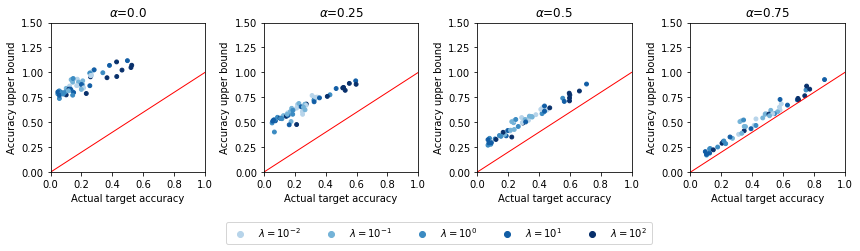

In [4]:
lambdas = [.01, .1, 1., 10., 100.]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5))
for k, alpha in enumerate([0., 0.25, 0.5, 0.75]):
    upper = np.zeros((10, 5))
    actual = np.zeros((10, 5))
    for i, seed in enumerate(range(1, 11)):
        for j, lamDIP in enumerate(lambdas):
            result = np.load(f'../results/DIPfail_SCM3_seed_{seed}_DIP_{lamDIP}_{1-alpha}_.npy')
            upper[i, j] = result[0]
            actual[i, j] = result[1]

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.3, 1.0)

    color = np.tile([1,2,3,4,5], 10)
    
    scatter = ax[k].scatter(actual.reshape(-1), upper.reshape(-1), c=color, s=15,
                          cmap=new_cmap)
    ax[k].plot([0, 1], [0, 1], 'r-', lw=1)
    ax[k].set_xlabel('Actual target accuracy')
    ax[k].set_ylabel('Accuracy upper bound')
    ax[k].set_xlim(0, 1)
    ax[k].set_ylim(0, 1.5)
    ax[k].set_title(r'$\alpha$=%s'%(alpha))
plt.tight_layout()
plt.subplots_adjust(bottom=0.3) 
ax.flatten()[-2].legend(handles=scatter.legend_elements()[0], labels=[r'$\lambda=10^{-2}$',
                                                            r'$\lambda=10^{-1}$',
                                                            r'$\lambda=10^{0}$',
                                                            r'$\lambda=10^{1}$',
                                                            r'$\lambda=10^{2}$'], loc='upper center',
                       ncol=5,bbox_to_anchor=(-.25, -0.3))
plt.savefig(f'../results/DIPfail_SCM3_DIP.jpeg', dpi=300)
plt.show()

## DIP on MNIST3 (Corollary 2)

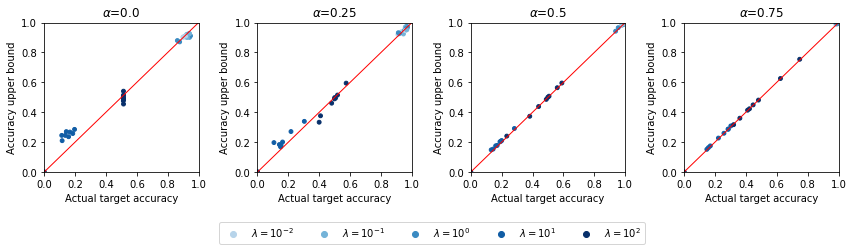

In [5]:
lambdas = [.01, .1, 1., 10., 100.]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5))
for k, alpha in enumerate([0., 0.25, 0.5, 0.75]):
    upper = np.zeros((10, 5))
    actual = np.zeros((10, 5))
    for i, seed in enumerate(range(1, 9)):
        for j, lamDIP in enumerate(lambdas):
            #result = np.load(f'../result2/DIPfail_SCM3_seed_{seed}_lamDIP_{lamDIP}_{1-alpha}.npy')
            #result = np.load(f'../result/DIPfail_SCM3_seed_{seed}_lamjointDIP_{lamDIP}.npy')
            result = np.load(f'../results/DIPfail_MNIST3_seed_{seed}_DIP_{lamDIP}_{1-alpha}_.npy')
            upper[i, j] = result[0]
            actual[i, j] = result[1]
    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.3, 1.0)

    color = np.tile([1,2,3,4,5], 10)
    
    scatter = ax[k].scatter(actual.reshape(-1), upper.reshape(-1), c=color, s=15,
                          cmap=new_cmap)
    ax[k].plot([0, 1], [0, 1], 'r-', lw=1)
    ax[k].set_xlabel('Actual target accuracy')
    ax[k].set_ylabel('Accuracy upper bound')
    ax[k].set_xlim(0, 1)
    ax[k].set_ylim(0, 1)
    ax[k].set_title(r'$\alpha$=%s'%(alpha))
plt.tight_layout()
plt.subplots_adjust(bottom=0.3) 
ax.flatten()[-2].legend(handles=scatter.legend_elements()[0], labels=[r'$\lambda=10^{-2}$',
                                                            r'$\lambda=10^{-1}$',
                                                            r'$\lambda=10^{0}$',
                                                            r'$\lambda=10^{1}$',
                                                            r'$\lambda=10^{2}$'], loc='upper center',
                       ncol=5,bbox_to_anchor=(-.25, -0.3))
plt.savefig(f'../results/DIPfail_MNIST3_DIP.jpeg', dpi=300)
plt.show()